# Se realiza el análisis del modelo entrenado para verificar su eficiencia
- Para probar el modelo las clases se dividieron de la siguiente manera:
    - Healthy: 201 imágenes
    - Armyworm: 222 imágenes
    - Leaf_blight: 103 imágenes

In [57]:
import tensorflow as tf
from tensorflow import keras
import os, sys
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    all_images = []
    #conv_base = keras.applications.vgg16.VGG16(weights ="imagenet", include_top = False, input_shape = (180, 180, 3))
    conv_base = keras.applications.resnet50.ResNet50(weights ="imagenet", include_top = False, input_shape = (180, 180, 3))
    for images, labels in dataset:
        #preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        preprocessed_images = keras.applications.resnet50.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
        for im in images:
            all_images.append(im)
    return all_images, np.concatenate(all_features), np.concatenate(all_labels)
    
def Get_predicts(test_dataset):
    images, features, labels = get_features_and_labels(test_dataset)
    preds = model.predict(features)
    pred = tf.argmax(preds, axis = 1)
    for i in range( len(pred) ):
        if int(pred[i]) != int(labels[i]):
            failed_images.append( [ images[i], labels[i], pred[i] ] )
    return labels, pred

def Plotting(results):
    fig = plt.figure(figsize = (24, 18))
    for i,res in enumerate(results):
        try:
            plt.subplot(4, 4, i + 1)
            plt.imshow(res[0].numpy().astype("uint8") , cmap = "viridis")
            plt.title('Real: ' + class_names[res[1]] + '\n Pred: '+class_names[res[2]], size = 15, color = "red")
            plt.axis("off")
        except:
            break
    plt.show()

batch_size = 32 
image_w_h = 180
path_test = 'test'
failed_images = []
image_size = (image_w_h, image_w_h) # (180, 180)
test_dataset = image_dataset_from_directory(
    path_test,
    image_size = image_size,
    batch_size = batch_size
) 
class_names = test_dataset.class_names
print('Clases existentes: ', class_names)

Found 526 files belonging to 3 classes.
Clases existentes:  ['Healthy', 'armyworm', 'leaf_blight']


### Análisis de la calidad del modelo entrenado

In [58]:
model = tf.keras.models.load_model('Trained_models/classifierV298.85931611061096.h5')
labels, pred = Get_predicts(test_dataset)

2023-04-17 15:13:13.647068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [526]
	 [[{{node Placeholder/_4}}]]
2023-04-17 15:13:13.647342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [526]
	 [[{{node Placeholder/_0}}]]


17/17 [==============================] - 0s 9ms/step


In [59]:
print(metrics.classification_report(labels, pred, digits=4))

              precision    recall  f1-score   support

           0     0.9803    0.9900    0.9851       201
           1     0.9955    0.9955    0.9955       222
           2     0.9901    0.9709    0.9804       103

    accuracy                         0.9886       526
   macro avg     0.9886    0.9855    0.9870       526
weighted avg     0.9886    0.9886    0.9886       526



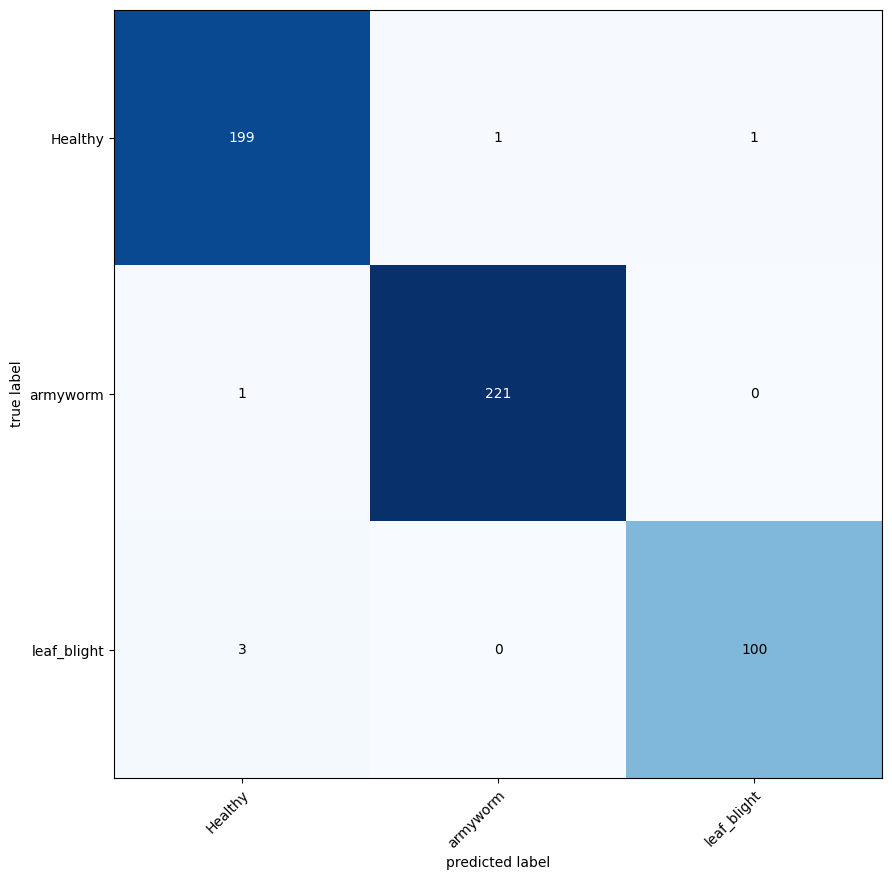

In [60]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matc = confusion_matrix(labels, pred)
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names=class_names, show_normed=False)
plt.tight_layout()

- Para Healthy se muestra que tuvo 199 imágenes como verdadero positivo, 4 como falso positivo y 2 como falso negativo.
- Para Armyworm se muestra que tuvo 221 imágenes como verdadero positivo, 1 como falso positivo y 1 como falso negativo.
- Para Leaft blight se muestra que tuvo 100 imágenes como verdadero positivo, 1 como falso positivo y 3 como falso negativo.

In [ ]:
print('Total de imágenes con error: ', len(failed_images))
Plotting(failed_images)

Total de imágenes con error:  6
